# Border Crossing Data Analysis

## Data Cleaning

In [1]:
%matplotlib inline
# Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Import dependency and set theme for visualizations
import seaborn as sns
sns.set_palette("muted")

# Store file path
csv_path="Resources/Border_Crossing_Entry_Data.csv"

# Read the csv file
data_df = pd.read_csv(csv_path)

# Display the dataset
data_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [2]:
# List the colums in the dataset
data_df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Location'],
      dtype='object')

In [3]:
# Reduce the dataset to the columns needed
reduced_df = data_df[['Port Name','State', 'Border', 'Date', 'Measure', 'Value', 'Location']]

# Display the new dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location
0,Calexico East,California,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [4]:
# Check the datatypes for all columns in the dataset
reduced_df.dtypes

Port Name    object
State        object
Border       object
Date         object
Measure      object
Value         int64
Location     object
dtype: object

In [5]:
# Change the datatype for "Date" column to datetime and check the datatypes again to confirm the conversion
reduced_df['Date'] = pd.to_datetime(reduced_df['Date'])
reduced_df.dtypes

C:\Users\sarap\AppData\Local\Temp\ipykernel_19744\3882508252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Date'] = pd.to_datetime(reduced_df['Date'])


Port Name            object
State                object
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Location             object
dtype: object

In [6]:
# Split the "Date" column to retrieve Year, Month and Day
reduced_df['Year']= reduced_df['Date'].dt.year
reduced_df['Month']= reduced_df['Date'].dt.month
reduced_df['Day']= reduced_df['Date'].dt.day

# Displayt the dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1


In [7]:
# Split the Location column to get Latitude and Longitude values
reduced_df[['Point', 'Longitude', 'Latitude']] = reduced_df['Location'].str.split(" ", expand = True)

# Display the dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day,Point,Longitude,Latitude
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1,POINT,(-115.48433000000001,32.67524)
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1,POINT,(-67.94271,47.16207)
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1,POINT,(-117.05333,32.57333)
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1,POINT,(-110.93361,31.340279999999996)
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1,POINT,(-73.44253,44.990010000000005)


In [8]:
# Remove the symbols from Latitude and Longitude columns which ar enot required:
reduced_df['Longitude'] = reduced_df['Longitude'].str.replace('(', '')
reduced_df['Latitude'] = reduced_df['Latitude'].str.replace(')', '')

# Display the dataset
reduced_df.head()

C:\Users\sarap\AppData\Local\Temp\ipykernel_19744\2535763533.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reduced_df['Longitude'] = reduced_df['Longitude'].str.replace('(', '')
C:\Users\sarap\AppData\Local\Temp\ipykernel_19744\2535763533.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reduced_df['Latitude'] = reduced_df['Latitude'].str.replace(')', '')


,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day,Point,Longitude,Latitude
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1,POINT,-115.48433000000001,32.67524
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1,POINT,-67.94271,47.16207
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1,POINT,-117.05333,32.57333
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1,POINT,-110.93361,31.340279999999996
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1,POINT,-73.44253,44.990010000000005


In [9]:
# Reduce the dataset to the columns needed
reduced_df = reduced_df[['Year', 'Month', 
                         'Border', 'Port Name', 'State', 
                         'Measure', 'Value', 
                         'Longitude', 'Latitude']]

# Display the dataset
reduced_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2019,3,US-Mexico Border,Calexico East,California,Trucks,34447,-115.48433000000001,32.67524
1,2019,3,US-Canada Border,Van Buren,Maine,Rail Containers Full,428,-67.94271,47.16207
2,2019,3,US-Mexico Border,Otay Mesa,California,Trucks,81217,-117.05333,32.57333
3,2019,3,US-Mexico Border,Nogales,Arizona,Trains,62,-110.93361,31.340279999999996
4,2019,3,US-Canada Border,Trout River,New York,Personal Vehicle Passengers,16377,-73.44253,44.990010000000005


In [10]:
# Filter the dataset for the years needed for analysis (2009 to 2018)
years_df = reduced_df.loc[(reduced_df["Year"] >= 2009) & (reduced_df["Year"] <= 2018)]

# Display the filtered dataset
years_df

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
2364,2018,12,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
2365,2018,12,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2366,2018,12,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.344439999999995
2367,2018,12,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
2368,2018,12,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988
...,...,...,...,...,...,...,...,...,...
146964,2009,1,US-Canada Border,Sherwood,North Dakota,Train Passengers,0,-101.63,49
146965,2009,1,US-Mexico Border,Progreso,Texas,Buses,7,-97.95,26.06
146966,2009,1,US-Canada Border,Friday Harbor,Washington,Truck Containers Full,0,-123.01,48.54
146967,2009,1,US-Canada Border,Port Huron,Michigan,Pedestrians,0,-82.42,43


In [11]:
# Convert the data in "Month" column to display the first three character of the month
years_df['Month'] = years_df['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                              ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the converted dataset
years_df.head()

C:\Users\sarap\AppData\Local\Temp\ipykernel_19744\2761720832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_df['Month'] = years_df['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],


,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
2364,2018,Dec,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
2365,2018,Dec,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2366,2018,Dec,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.344439999999995
2367,2018,Dec,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
2368,2018,Dec,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988


In [12]:
# Drop any rows with blank values and reset the index
final_df = years_df.reset_index(drop=True).dropna()

# Display the final dataset
final_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2018,Dec,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
1,2018,Dec,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2,2018,Dec,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.344439999999995
3,2018,Dec,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
4,2018,Dec,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988


In [13]:
# Export the CSV for final data
final_df.to_csv('Output/Border_Crossing_Final_Data.csv')

# Analysis for Research Questions

## Question 1: Which is the busiest border for US?

In [14]:
# Evaluate the type of traffic passing through borders to help categorize
final_df["Measure"].value_counts()

Personal Vehicles              13248
Personal Vehicle Passengers    13228
Trucks                         12921
Truck Containers Empty         12824
Truck Containers Full          12771
Buses                          12000
Bus Passengers                 11998
Pedestrians                    11879
Trains                         10971
Rail Containers Empty          10947
Rail Containers Full           10923
Train Passengers               10895
Name: Measure, dtype: int64

We are categorizing the border crossing traffic into two overall types:

1 - Number of people crossing the border

2 - Number of vehicles crossing the border

In [15]:
# Filter the dataset to only people traffic

people_df = final_df.loc[(final_df["Measure"] == 'Personal Vehicle Passengers') | 
                         (final_df["Measure"] == 'Bus Passengers') | 
                         (final_df["Measure"] == 'Pedestrians') | 
                         (final_df["Measure"] == 'Train Passengers')]

# Display the data
people_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
3,2018,Dec,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
4,2018,Dec,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61738999999999,48.49988
7,2018,Dec,US-Mexico Border,Columbus,New Mexico,Pedestrians,24168,-107.63944,31.827499999999997
12,2018,Dec,US-Mexico Border,Lukeville,Arizona,Personal Vehicle Passengers,56937,-112.81500000000001,31.8825
15,2018,Dec,US-Canada Border,Highgate Springs-Alburg,Vermont,Personal Vehicle Passengers,63798,-73.10583,44.979440000000004


In [16]:
# Filter the dataset to only vehicle traffic

vehicles_df = final_df.loc[(final_df["Measure"] == 'Personal Vehicles') | 
                         (final_df["Measure"] == 'Trucks') | 
                         (final_df["Measure"] == 'Truck Containers Empty') | 
                         (final_df["Measure"] == 'Truck Containers Full') | 
                         (final_df["Measure"] == 'Buses') | 
                         (final_df["Measure"] == 'Trains') | 
                         (final_df["Measure"] == 'Rail Containers Empty') | 
                         (final_df["Measure"] == 'Rail Containers Full')]

# Display the data
vehicles_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2018,Dec,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
1,2018,Dec,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2,2018,Dec,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.344439999999995
5,2018,Dec,US-Mexico Border,Brownsville,Texas,Truck Containers Full,9871,-97.49722,25.90139
6,2018,Dec,US-Canada Border,Maida,North Dakota,Truck Containers Empty,162,-98.36953,48.98568


In [ ]:
# # Set x axis and tick locations based on filtered data from previous chart
# x_axis = np.arange(len(people1_df))

# # Create a bar chart based on the above data
# figure1 = plt.bar(x_axis, people1_df, align="center")

# # Set the tick locations and create ticks for bar chart's x-axis
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, people1_df.index, rotation="horizontal", fontsize=8)

# # Set x and y limits
# plt.xlim(-1, len(x_axis))
# plt.ylim(0, max(people1_df)+100000000)

# # Add title and labels to the chart
# plt.title("Number of People crossing US border")
# plt.xlabel("Border")
# plt.ylabel("Number of People")

# # Show the chart
# plt.tight_layout()
# plt.show

In [106]:
people_data = people_df.groupby(["Year", "Border", "Measure"]).sum()
people_data

Value
Year Border           Measure                               
2009 US-Canada Border Bus Passengers                 2503417
                      Pedestrians                     376216
                      Personal Vehicle Passengers   53528341
                      Train Passengers                217833
     US-Mexico Border Bus Passengers                 2429190
...                                                      ...
2018 US-Canada Border Train Passengers                289317
     US-Mexico Border Bus Passengers                 1838132
                      Pedestrians                   46173881
                      Personal Vehicle Passengers  144891237
                      Train Passengers                 10436

[80 rows x 1 columns]

In [107]:
people2_df=people_data.reset_index()
people2_df

,Year,Border,Measure,Value
0,2009,US-Canada Border,Bus Passengers,2503417
1,2009,US-Canada Border,Pedestrians,376216
2,2009,US-Canada Border,Personal Vehicle Passengers,53528341
3,2009,US-Canada Border,Train Passengers,217833
4,2009,US-Mexico Border,Bus Passengers,2429190
...,...,...,...,...
75,2018,US-Canada Border,Train Passengers,289317
76,2018,US-Mexico Border,Bus Passengers,1838132
77,2018,US-Mexico Border,Pedestrians,46173881
78,2018,US-Mexico Border,Personal Vehicle Passengers,144891237


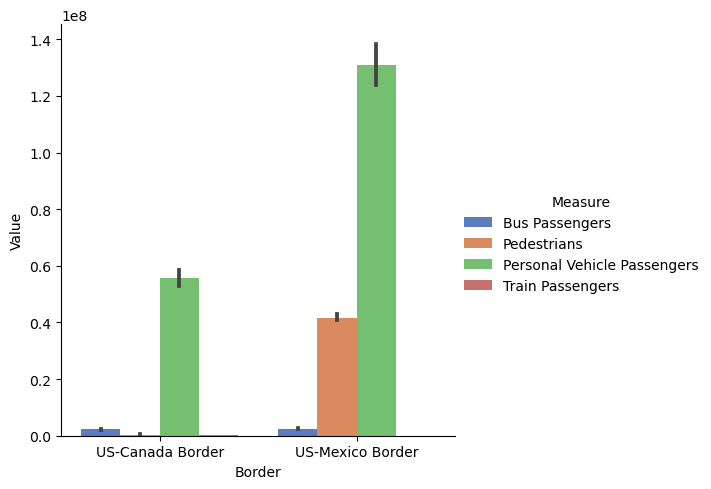

In [108]:
# Fig1 = sns.catplot(data=people_data, kind="bar", x="Border", y="Value")

Fig1 = sns.catplot(kind="bar", data=people2_df, x="Border", y="Value", hue="Measure")
# Fig1 = sns.barplot(people_data, people_data)
# people_data.set_index('Border').plot(kind='bar', stacked=True)
# Fig1.set_xlabel("Border")
# Fig1.set_ylabel("Number of people")
# Fig1.set_title("Number of people crossing US border")
# plt.show()